# Data Wrangling Template

## Gather

In [2]:
import zipfile

In [3]:
# Extract all the contents from zip file
with zipfile.ZipFile('armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall()

## Assess

In [4]:
import pandas as pd

In [6]:
# Read CSV (comma-separated) file into DataFrame
df=pd.read_csv('online-job-postings.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

- Missing values (NaN)
- StartDate inconsistencies (ASAP)
- Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

## Clean
### Issue 1
#### Define
>Select all the non descriptive column heads (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace the with descriptive column headers (ApplicationProcedure, AboutCompany, RequiredQualification, JobRequirement)
#### Code

In [9]:
# Creating a copy of the original data for making all the changes
df_clean= df.copy()

In [28]:
# Renaming all the non descriptive column heads using rename function
df_clean = df_clean.rename(columns={'ApplicationP':'ApplicationProcedure','AboutC':'AboutCompany','RequiredQual':'RequiredQualifications','JobRequirment':'JobRequirements'})

#### Test

In [29]:
# Testing if the changes had taken place
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                   19001 non-null object
date                      19001 non-null object
Title                     18973 non-null object
Company                   18994 non-null object
AnnouncementCode          1208 non-null object
Term                      7676 non-null object
Eligibility               4930 non-null object
Audience                  640 non-null object
StartDate                 9675 non-null object
Duration                  10798 non-null object
Location                  18969 non-null object
JobDescription            15109 non-null object
JobRequirements           16479 non-null object
RequiredQualifications    18517 non-null object
Salary                    9622 non-null object
ApplicationProcedure      18941 non-null object
OpeningDate               18295 non-null object
Deadline                  18936 non-null object
Notes                     2211 non

### Issue 2
#### Define
>Select all the records in the StartDate column and that contains As soon as possible, Immediatly etc and replace it with ASAP
#### Code

In [12]:
# Creating a list of all the records of the StartDate with urgent job postings.
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

# Replacing them with ASAP using for loop
for i in asap_list:
    df_clean.StartDate.replace(i,'ASAP',inplace=True)

#### Test

In [30]:
# Checking if the changes had taken place
df_clean.StartDate.value_counts()

ASAP                                                                                                                                                         6856
01 September 2012                                                                                                                                              31
March 2006                                                                                                                                                     27
November 2006                                                                                                                                                  22
January 2010                                                                                                                                                   19
February 2014                                                                                                                                                  17
01 February 2005            

In [18]:
# Can also check by using assert keyword
for i in asap_list:
    assert i not in df_clean.StartDate.values

In [19]:
# percentage of urgent job postings
asap_counts = df_clean.StartDate.value_counts()['ASAP']
total_counts = df_clean.StartDate.count()
asap_counts/total_counts

0.7086304909560723

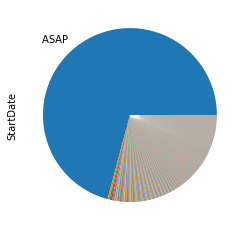

In [25]:
# Representing using pie chart 
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()),"", dtype=object)
labels[0]='ASAP '
df_clean.StartDate.value_counts().plot(kind='pie',labels=labels);

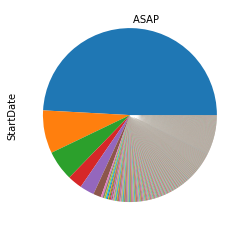

In [26]:
# And for old data set
labels = np.full(len(df.StartDate.value_counts()),"", dtype=object)
labels[0]='ASAP '
df.StartDate.value_counts().plot(kind='pie',labels=labels);

In [31]:
# percentage of urgent job postings in the old dataset
asap_counts = df.StartDate.value_counts()['ASAP']
total_counts = df.StartDate.count()
asap_counts/total_counts

0.4913695090439276